**Chapter 10 – Introduction to Artificial Neural Networks - Part 1**

_This notebook contains all the sample code and solutions to the exercises in chapter 10._

# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptrons

**Note**: we set `max_iter` and `tol` explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int) # Iros-Setosa?

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1])

Saving figure perceptron_iris_plot


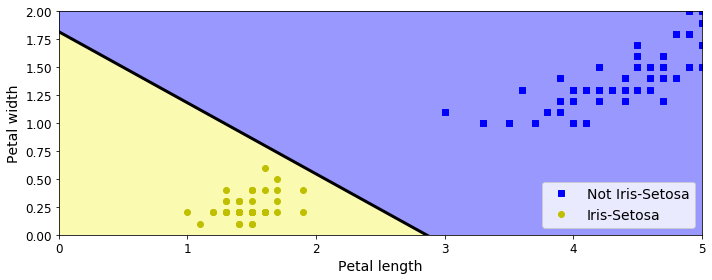

In [4]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

In [5]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


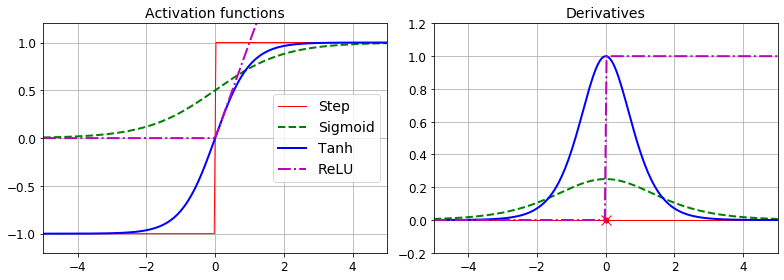

In [6]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

In [7]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

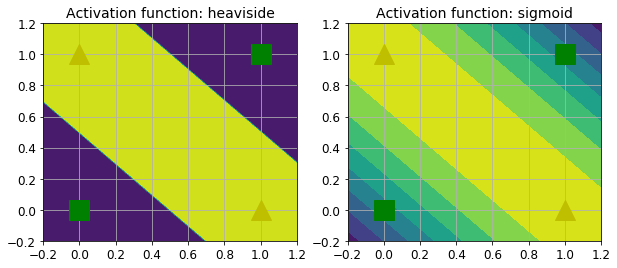

In [8]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

### [Practice]
**Draw activation fucntions of ELU, Leaky ReLU, and ReLU6**

# Tensorflow using MNIST

## Data reading and preprocessing

In [9]:
import tensorflow as tf
tf.__version__

'2.1.0'

In [10]:
# data read and node decaration. 2D type data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# train data 60000 -> validation 5000 + train 55000
X_valid, X_train1 = X_train[:5000], X_train[5000:]
y_valid, y_train1 = y_train[:5000], y_train[5000:]
print(X_train.shape,y_train.shape)
print(X_train1.shape,y_train1.shape)
print("X_train[0] = ")
print(X_train[0])
print("y_train[0] = ", y_train[0])

11493376/11490434 [==============================] - 13s 1us/step
(60000, 28, 28) (60000,)
(55000, 28, 28) (55000,)
X_train[0] = 
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 2

In [11]:
# Flattened and normalized ( 0 ~ 1) data instances
X_train_1d = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test_1d = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train_1d = y_train.astype(np.int32)
y_test_1d = y_test.astype(np.int32)
# train data 60000 -> validation 5000 + train 55000
X_valid_1d, X_train1_1d = X_train_1d[:5000], X_train_1d[5000:]
y_valid_1d, y_train1_1d = y_train_1d[:5000], y_train_1d[5000:]
print(X_train_1d.shape, X_train1_1d.shape)
print("X_train_1d[0] = ")
print(X_train_1d[0])

(60000, 784) (55000, 784)
X_train_1d[0] = 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0

## Using the Estimator API : DNN classifier

In [12]:
# Specify input: 1D flattened data
feature_cols = [tf.feature_column.numeric_column("X", shape=[28 * 28])]
# DNN creation: input, hidden_1 (300), hidden_2 (100), output (softmax)
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                     feature_columns=feature_cols)

# epoch: 10, batch size:100
input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_train_1d}, y=y_train_1d, num_epochs=10, 
                                                        batch_size=100, shuffle=True)
#input_fn=tf.data.Dataset.from_tensors((X_train, y_train))
#input_fn=input_fn.batch(50)
dnn_clf.train(input_fn=input_fn)
train_results=dnn_clf.evaluate(input_fn=input_fn)
num_epoch=10
print('epoch:', num_epoch, train_results)
#Training another 20 epochs
dnn_clf.train(input_fn=input_fn)
train_results=dnn_clf.evaluate(input_fn=input_fn)
print('epoch:', num_epoch+num_epoch, train_results)
# Compare the results
# loss (mean loss per mini-batch) 
# average_loss (mean loss per sample)
# global_step (60000/100*10 = 6000)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmp2npxk585', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use Varia

INFO:tensorflow:loss = 0.34044728, step = 4700 (0.221 sec)
INFO:tensorflow:global_step/sec: 452.941
INFO:tensorflow:loss = 0.3236239, step = 4800 (0.221 sec)
INFO:tensorflow:global_step/sec: 464.629
INFO:tensorflow:loss = 0.36684304, step = 4900 (0.215 sec)
INFO:tensorflow:global_step/sec: 467.138
INFO:tensorflow:loss = 0.4369994, step = 5000 (0.214 sec)
INFO:tensorflow:global_step/sec: 457.669
INFO:tensorflow:loss = 0.27121475, step = 5100 (0.219 sec)
INFO:tensorflow:global_step/sec: 456.641
INFO:tensorflow:loss = 0.32661626, step = 5200 (0.219 sec)
INFO:tensorflow:global_step/sec: 458.421
INFO:tensorflow:loss = 0.38811627, step = 5300 (0.218 sec)
INFO:tensorflow:global_step/sec: 483.113
INFO:tensorflow:loss = 0.35814774, step = 5400 (0.207 sec)
INFO:tensorflow:global_step/sec: 444.805
INFO:tensorflow:loss = 0.336128, step = 5500 (0.225 sec)
INFO:tensorflow:global_step/sec: 462.074
INFO:tensorflow:loss = 0.25120902, step = 5600 (0.217 sec)
INFO:tensorflow:global_step/sec: 441.572
INFO

INFO:tensorflow:global_step/sec: 465.742
INFO:tensorflow:loss = 0.32023773, step = 11400 (0.214 sec)
INFO:tensorflow:global_step/sec: 472.549
INFO:tensorflow:loss = 0.18011421, step = 11500 (0.212 sec)
INFO:tensorflow:global_step/sec: 459.637
INFO:tensorflow:loss = 0.3353347, step = 11600 (0.218 sec)
INFO:tensorflow:global_step/sec: 465.845
INFO:tensorflow:loss = 0.25358978, step = 11700 (0.215 sec)
INFO:tensorflow:global_step/sec: 462.573
INFO:tensorflow:loss = 0.39178342, step = 11800 (0.216 sec)
INFO:tensorflow:global_step/sec: 458.065
INFO:tensorflow:loss = 0.2593007, step = 11900 (0.218 sec)
INFO:tensorflow:Saving checkpoints for 12000 into /tmp/tmp2npxk585/model.ckpt.
INFO:tensorflow:Loss for final step: 0.100084536.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-08T02:07:26Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2npxk585/model.ckpt-12000
INFO:tensorflow:Runni

In [13]:
test_input_fn = tf.compat.v1.estimator.inputs.numpy_input_fn(x={"X": X_test_1d}, y=y_test_1d, shuffle=False)
test_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-06-08T02:07:38Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2npxk585/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.29597s
INFO:tensorflow:Finished evaluation at 2020-06-08-02:07:38
INFO:tensorflow:Saving dict for global step 12000: accuracy = 0.9292, average_loss = 0.2550385, global_step = 12000, loss = 0.25351363
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 12000: /tmp/tmp2npxk585/model.ckpt-12000


In [14]:
print(test_results)

{'accuracy': 0.9292, 'average_loss': 0.2550385, 'loss': 0.25351363, 'global_step': 12000}


In [15]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0] # image '7'

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmp2npxk585/model.ckpt-12000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([ 0.8200042 , -3.8855357 ,  0.6927134 ,  1.4961061 , -2.857368  ,
        -0.48562855, -3.7607284 ,  8.076335  , -1.0821798 ,  1.8168902 ],
       dtype=float32),
 'probabilities': array([7.02213380e-04, 6.35154220e-06, 6.18282880e-04, 1.38069049e-03,
        1.77585207e-05, 1.90300576e-04, 7.19585387e-06, 9.95069504e-01,
        1.04799896e-04, 1.90287875e-03], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object),
 'all_class_ids': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32),
 'all_classes': array([b'0', b'1', b'2', b'3', b'4', b'5', b'6', b'7', b'8', b'9'],
       dtype=object)}

### [Practice]
**Print training evaluation reulsts and test evaluation results every epoch until 100 epochs.
Determine the number of epochs and accuracy for training and explain why.**

# Exercise
Number of hidden nodes = 300 x 100 = 30,000

Compare the results for smaller number of nodes

Compare the results with less and larger number of hidden layers for the same number of nodes

Batch accuracy should be larger than 0.98. If it is less than 0.98, increase n_epoch.

Fill the tables: Val_accuracy and determine the best case.

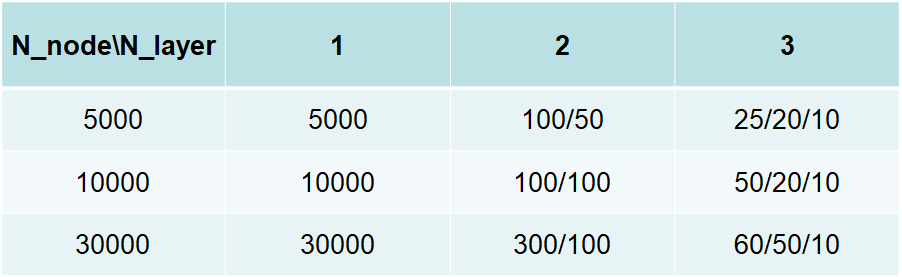